In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Load Pre-Processed Train / Test Data

train_df = pd.read_csv('Train-Data.csv')
test_df = pd.read_csv('Test-Data.csv')

print(f'Train Length: {len(train_df)}, Test Length: {len(test_df)}')

Train Length: 1760, Test Length: 440


In [3]:
#Prepare Data For ML input
trainx = np.array(train_df.iloc[:,:-1].values.tolist())
trainy = np.array(train_df['label'].tolist())

testx = np.array(test_df.iloc[:,:-1].values.tolist())
testy = np.array(test_df['label'].tolist())

In [4]:
#Validate Correct Input Shapes
print(f'Trainx: {trainx.shape}, Trainy: {trainy.shape}')
print(f'Testx: {testx.shape}, Testy: {testy.shape}')

Trainx: (1760, 7), Trainy: (1760,)
Testx: (440, 7), Testy: (440,)


In [5]:
#Encode Classification Labels
le = LabelEncoder()

le.fit(trainy)

trainy = le.transform(trainy)
testy = le.transform(testy)

In [6]:
#Build Fully Connected Neural Network Model
FCNN = Sequential()
FCNN.add(Dense(32, input_dim=7, activation='relu'))
FCNN.add(Dense(64, activation='relu'))
FCNN.add(Dense(22, activation='softmax'))
FCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
FCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 22)                1430      
                                                                 
Total params: 3,798
Trainable params: 3,798
Non-trainable params: 0
_________________________________________________________________


In [8]:
FCNN.fit(trainx, trainy, epochs=50, batch_size=32)

Epoch 1/50
55/55 [==============================] - 1s 772us/step - loss: 9.7518 - accuracy: 0.1341
Epoch 2/50
55/55 [==============================] - 0s 680us/step - loss: 1.0181 - accuracy: 0.6841
Epoch 3/50
55/55 [==============================] - 0s 680us/step - loss: 0.5059 - accuracy: 0.8409
Epoch 4/50
55/55 [==============================] - 0s 661us/step - loss: 0.3519 - accuracy: 0.8977
Epoch 5/50
55/55 [==============================] - 0s 689us/step - loss: 0.2989 - accuracy: 0.9125
Epoch 6/50
55/55 [==============================] - 0s 671us/step - loss: 0.2553 - accuracy: 0.9205
Epoch 7/50
55/55 [==============================] - 0s 827us/step - loss: 0.2222 - accuracy: 0.9358
Epoch 8/50
55/55 [==============================] - 0s 735us/step - loss: 0.2049 - accuracy: 0.9443
Epoch 9/50
55/55 [==============================] - 0s 671us/step - loss: 0.1936 - accuracy: 0.9449
Epoch 10/50
55/55 [==============================] - 0s 661us/step - loss: 0.1726 - accuracy: 0.9466

In [9]:
FCNN_Preds = FCNN.predict(testx)
FCNN_Preds = np.array([np.argmax(i) for i in FCNN_Preds])

14/14 [==============================] - 0s 554us/step


In [10]:
def get_performance_metrics(preds):
    metrics = {}
    metrics['acc'] = accuracy_score(testy, preds)
    metrics['prec'] = precision_score(testy, preds, average='macro')
    metrics['rec'] = recall_score(testy, preds, average='macro')
    metrics['f1'] = f1_score(testy, preds, average='macro')
    metrics['cm'] = confusion_matrix(testy, preds)
    return metrics

In [11]:
FCNN_Metrics = get_performance_metrics(FCNN_Preds)

0.9590909090909091


In [12]:
#Build CNN
CNN = Sequential()
CNN.add(Conv1D(filters=32, kernel_size=3, input_shape=(7, 1), activation='relu'))
CNN.add(Flatten())
CNN.add(Dense(128, activation='relu'))
CNN.add(Dense(22, activation='softmax'))
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
trainx_reshaped = trainx.reshape(trainx.shape[0], 7, 1)
testx_reshaped = testx.reshape(testx.shape[0], 7, 1)
CNN.fit(trainx_reshaped, trainy, epochs=50, batch_size=32)

Epoch 1/50
55/55 [==============================] - 0s 836us/step - loss: 3.0297 - accuracy: 0.4443
Epoch 2/50
55/55 [==============================] - 0s 836us/step - loss: 0.4560 - accuracy: 0.8557
Epoch 3/50
55/55 [==============================] - 0s 762us/step - loss: 0.3100 - accuracy: 0.9091
Epoch 4/50
55/55 [==============================] - 0s 762us/step - loss: 0.2289 - accuracy: 0.9227
Epoch 5/50
55/55 [==============================] - 0s 772us/step - loss: 0.1961 - accuracy: 0.9369
Epoch 6/50
55/55 [==============================] - 0s 808us/step - loss: 0.1649 - accuracy: 0.9455
Epoch 7/50
55/55 [==============================] - 0s 808us/step - loss: 0.1499 - accuracy: 0.9506
Epoch 8/50
55/55 [==============================] - 0s 799us/step - loss: 0.1397 - accuracy: 0.9540
Epoch 9/50
55/55 [==============================] - 0s 790us/step - loss: 0.1357 - accuracy: 0.9557
Epoch 10/50
55/55 [==============================] - 0s 781us/step - loss: 0.1125 - accuracy: 0.9659

In [14]:
CNN_Preds = CNN.predict(testx)
CNN_Preds = np.array([np.argmax(i) for i in CNN_Preds])

14/14 [==============================] - 0s 649us/step


In [15]:
CNN_Metrics = get_performance_metrics(CNN_Preds)

In [16]:
print("FCNN Metrics:", {k:round(v, 3) for k,v in FCNN_Metrics.items() if k != 'cm'})
print("CNN Metrics:", {k:round(v, 3) for k,v in CNN_Metrics.items() if k != 'cm'})

FCNN Metrics: {'acc': 0.959, 'prec': 0.959, 'rec': 0.962, 'f1': 0.959}
CNN Metrics: {'acc': 0.957, 'prec': 0.958, 'rec': 0.96, 'f1': 0.958}


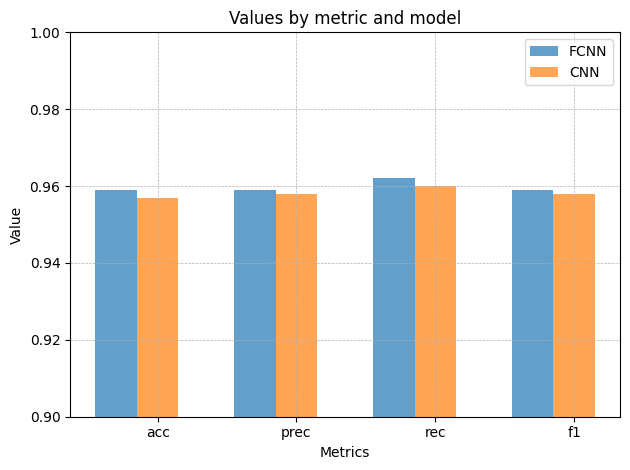

In [20]:
#Visualise Metrics
FCNN_Dict = {k:round(v, 3) for k,v in FCNN_Metrics.items() if k != 'cm'}
CNN_Dict = {k:round(v, 3) for k,v in CNN_Metrics.items() if k != 'cm'}

labels = list(FCNN_Dict.keys())
FCNN_vals = list(FCNN_Dict.values())
CNN_vals = list(CNN_Dict.values())

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, FCNN_vals, width, label='FCNN', alpha=0.7)
rects2 = ax.bar(x, CNN_vals, width, label='CNN', alpha=0.7)

ax.set_ylim(0.9, 1.0)
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Values by metric and model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

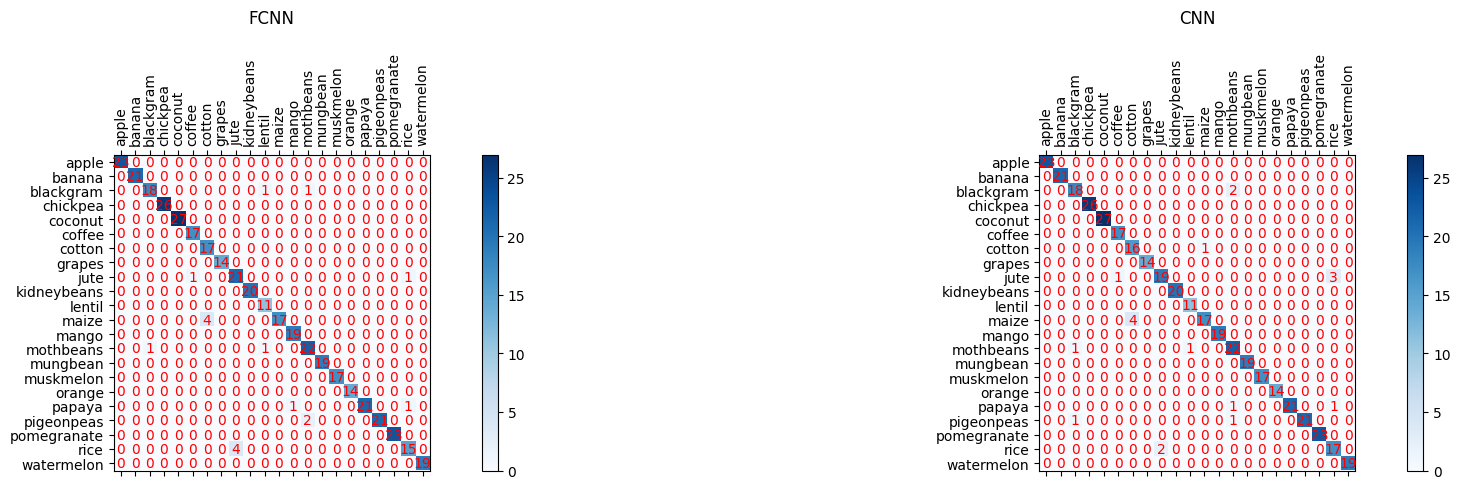

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

cms = [FCNN_Metrics['cm'], CNN_Metrics['cm']]
titles = ['FCNN', 'CNN']

for ax, cm, title in zip(axes, cms, titles):

    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.colorbar(cax, ax=ax)
    ax.set_title(title, pad=20)
    ax.set_xticks(np.arange(len(le.classes_)))
    ax.set_yticks(np.arange(len(le.classes_)))
    ax.set_xticklabels(le.classes_, rotation=90)
    ax.set_yticklabels(le.classes_)
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

plt.tight_layout()
plt.show()